In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import hvplot.pandas
import pandas as pd
import numpy as np
import requests
import json
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# Study data files
provinces_path= "DataSets_project_2/NFD-Num_fires_by_cause_EN_FR.csv"

# Read the mouse data and the study results
ForestFire_provinces = pd.read_csv(provinces_path, encoding= "ISO-8859-1")

ForestFire_provinces.head()

,Year,Année,ISO,Jurisdiction,Juridiction,Cause,Origine,Number,Data Qualifier,Nombre,Qualificatifs de données
0,1990,1990,AB,Alberta,Alberta,Human activity,Activités humaines,379.0,a,379.0,a
1,1990,1990,AB,Alberta,Alberta,Lightning,Foudre,971.0,a,971.0,a
2,1990,1990,AB,Alberta,Alberta,Unspecified,Indéterminée,16.0,a,16.0,a
3,1990,1990,BC,British Columbia,Colombie-Britannique,Human activity,Activités humaines,1240.0,a,1240.0,a
4,1990,1990,BC,British Columbia,Colombie-Britannique,Lightning,Foudre,2015.0,a,2015.0,a


In [3]:
ForestFire_provinces.rename(columns={"Jurisdiction":"Jurisdiction", "Juridiction" : "Juridiction-FR"}, inplace=True) 
ForestFire_provinces

,Year,Année,ISO,Jurisdiction,Juridiction-FR,Cause,Origine,Number,Data Qualifier,Nombre,Qualificatifs de données
0,1990,1990,AB,Alberta,Alberta,Human activity,Activités humaines,379.0,a,379.0,a
1,1990,1990,AB,Alberta,Alberta,Lightning,Foudre,971.0,a,971.0,a
2,1990,1990,AB,Alberta,Alberta,Unspecified,Indéterminée,16.0,a,16.0,a
3,1990,1990,BC,British Columbia,Colombie-Britannique,Human activity,Activités humaines,1240.0,a,1240.0,a
4,1990,1990,BC,British Columbia,Colombie-Britannique,Lightning,Foudre,2015.0,a,2015.0,a
...,...,...,...,...,...,...,...,...,...,...,...
1054,2021,2021,PC,Parks Canada,Parcs Canada,Unspecified,Indéterminée,73.0,e,73.0,e
1055,2021,2021,PE,Prince Edward Island,Île-du-Prince-Édouard,Unspecified,Indéterminée,1.0,e,1.0,e
1056,2021,2021,QC,Quebec,Québec,Unspecified,Indéterminée,625.0,e,625.0,e
1057,2021,2021,SK,Saskatchewan,Saskatchewan,Unspecified,Indéterminée,635.0,e,635.0,e


In [4]:
ForestFire_provinces.drop(['Année', "Juridiction-FR", 'Origine', "Nombre", "Qualificatifs de données"], axis=1, inplace=True)
#ForestFire_provinces

In [5]:
ForestFire_provinces = ForestFire_provinces[ForestFire_provinces["Year"] != 2021]

In [6]:
Sum_fire_Prov = ForestFire_provinces.groupby(["Jurisdiction"]).sum()

C:\Users\nikit\AppData\Local\Temp\ipykernel_4748\2161843307.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Sum_fire_Prov = ForestFire_provinces.groupby(["Jurisdiction"]).sum()


In [7]:
Sum_fire_Prov.drop(["Year"], axis =1, inplace = True)
Sum_fire_Prov

,Number
Jurisdiction,
Alberta,40315.0
British Columbia,57893.0
Manitoba,14046.0
New Brunswick,10480.0
Newfoundland and Labrador,3150.0
Northwest Territories,7438.0
Nova Scotia,9051.0
Ontario,35770.0
Prince Edward Island,549.0


In [8]:
Sum_fire_Prov.rename(columns  = {"Number":"Tot_Forest_Fires"}, inplace=True)
Sum_fire_Prov

,Tot_Forest_Fires
Jurisdiction,
Alberta,40315.0
British Columbia,57893.0
Manitoba,14046.0
New Brunswick,10480.0
Newfoundland and Labrador,3150.0
Northwest Territories,7438.0
Nova Scotia,9051.0
Ontario,35770.0
Prince Edward Island,549.0


In [9]:
Capital_Cities = ["Edmonton", "Victoria", "Winnipeg", "Fredericton", "St. John's", "Yellowknife", "Halifax",
                 "Toronto", "Charlottetown", "Montréal", "Regina", "Whitehorse"]

In [10]:
Sum_fire_Prov["Capital Cities"] = Capital_Cities 
Sum_fire_Prov["Longitude"] = ""
Sum_fire_Prov["Latitude"] = ""

In [11]:
Sum_fire_Prov

,Tot_Forest_Fires,Capital Cities,Longitude,Latitude
Jurisdiction,,,,
Alberta,40315.0,Edmonton,,
British Columbia,57893.0,Victoria,,
Manitoba,14046.0,Winnipeg,,
New Brunswick,10480.0,Fredericton,,
Newfoundland and Labrador,3150.0,St. John's,,
Northwest Territories,7438.0,Yellowknife,,
Nova Scotia,9051.0,Halifax,,
Ontario,35770.0,Toronto,,
Prince Edward Island,549.0,Charlottetown,,


In [12]:
base_url = "https://geogratis.gc.ca/services/geoname/en/geonames.json?q="

for index, row in Sum_fire_Prov.iterrows():
    city = row["Capital Cities"]
    Query_url = base_url + city
    geo_data = requests.get(Query_url).json()
    
    Sum_fire_Prov.loc[index, 'Longitude'] = geo_data["items"][0]["longitude"]
    Sum_fire_Prov.loc[index, 'Latitude'] = geo_data["items"][0]["latitude"]
    

Sum_fire_Prov

,Tot_Forest_Fires,Capital Cities,Longitude,Latitude
Jurisdiction,,,,
Alberta,40315.0,Edmonton,-113.490278,53.534444
British Columbia,57893.0,Victoria,-123.364722,48.428333
Manitoba,14046.0,Winnipeg,-97.146389,49.884444
New Brunswick,10480.0,Fredericton,-66.666667,45.945278
Newfoundland and Labrador,3150.0,St. John's,-52.797069,47.482197
Northwest Territories,7438.0,Yellowknife,-114.37,62.4536
Nova Scotia,9051.0,Halifax,-63.590651,44.647401
Ontario,35770.0,Toronto,-79.3733,43.7417
Prince Edward Island,549.0,Charlottetown,-63.134722,46.240278


In [13]:
Sum_fire_Prov = Sum_fire_Prov.reset_index()
Sum_fire_Prov

,Jurisdiction,Tot_Forest_Fires,Capital Cities,Longitude,Latitude
0,Alberta,40315.0,Edmonton,-113.490278,53.534444
1,British Columbia,57893.0,Victoria,-123.364722,48.428333
2,Manitoba,14046.0,Winnipeg,-97.146389,49.884444
3,New Brunswick,10480.0,Fredericton,-66.666667,45.945278
4,Newfoundland and Labrador,3150.0,St. John's,-52.797069,47.482197
5,Northwest Territories,7438.0,Yellowknife,-114.37,62.4536
6,Nova Scotia,9051.0,Halifax,-63.590651,44.647401
7,Ontario,35770.0,Toronto,-79.3733,43.7417
8,Prince Edward Island,549.0,Charlottetown,-63.134722,46.240278
9,Quebec,22010.0,Montréal,-73.554077,45.508822


In [14]:
map_plot_1= Sum_fire_Prov.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "StamenToner",
    frame_width = 700,
    frame_height = 500,
    size = "Tot_Forest_Fires",
    scale = 0.2,
    color = "Jurisdiction",
    attr_labels = True
)


# Display the map
map_plot_1

C:\Users\nikit\anaconda\envs\dev\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Jurisdiction,Tot_Forest_Fires)

In [15]:
map_plot_2= Sum_fire_Prov.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "StamenTerrain",
    frame_width = 700,
    frame_height = 500,
    size = "Tot_Forest_Fires",
    scale = 0.2,
    color = "Jurisdiction",
    attr_labels = True
)


# Display the map
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Jurisdiction,Tot_Forest_Fires)

In [16]:
map_plot_3= Sum_fire_Prov.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "CartoDark",
    frame_width = 700,
    frame_height = 500,
    size = "Tot_Forest_Fires",
    scale = 0.2,
    color = "Jurisdiction",
    attr_labels = True
)


# Display the map
map_plot_3

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Jurisdiction,Tot_Forest_Fires)

In [17]:
map_plot_4= Sum_fire_Prov.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OpenTopoMap",
    frame_width = 700,
    frame_height = 500,
    size = "Tot_Forest_Fires",
    scale = 0.2,
    color = "Jurisdiction",
    attr_labels = True
)


# Display the map
map_plot_4

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Jurisdiction,Tot_Forest_Fires)

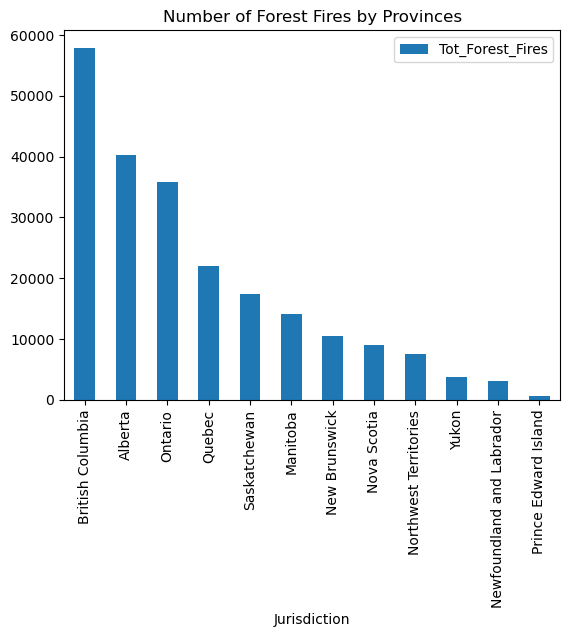

In [18]:
Sum_fire_Prov = Sum_fire_Prov.sort_values(["Tot_Forest_Fires"], ascending = False)
Sum_fire_Prov.plot.bar(x= "Jurisdiction", y="Tot_Forest_Fires", title="Number of Forest Fires by Provinces");
plt.show(block=True);

In [19]:
Sum_fire_years = ForestFire_provinces.groupby(["Year"]).sum()
Sum_fire_years = Sum_fire_years.rename(columns={"Number": "Tot. Fires"})

C:\Users\nikit\AppData\Local\Temp\ipykernel_4748\1432617680.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Sum_fire_years = ForestFire_provinces.groupby(["Year"]).sum()


In [20]:
Total_Forest_fire = Sum_fire_years["Number"].sum()
Total_Forest_fire

KeyError: 'Number'

In [ ]:
# Study data files
CO2_path= "DataSets_project_2/clean_deforestation.csv"

# Read the mouse data and the study results
CO2_emmission_df = pd.read_csv(CO2_path)

CO2_emmission_df

In [ ]:
CO2_emmission_Year = CO2_emmission_df.groupby(["Year"])

In [ ]:
Co2_emmision_by_year = CO2_emmission_Year["Co2 Emissions (mg)"].sum()
Co2_emmision_by_year = pd.DataFrame(Co2_emmision_by_year)

In [ ]:
#merging Co2 emmission data with no.of fires
Co2_merged_Tot_fires = Co2_emmision_by_year.merge(Sum_fire_years, how ="inner", on="Year")
Co2_merged_Tot_fires.reset_index(inplace=True)

Co2_merged_Tot_fires

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.figure(figsize=(10,6))
Fig4 = plt.plot(Co2_merged_Tot_fires["Year"],Co2_merged_Tot_fires["Tot. Fires"], 
         label = "Tot. Fires", marker = "o", color = "green")
#Fig4(xticks=Co2_merged_Tot_fires["Year"]) 

#Fig4.set_xticklabels(Co2_merged_Tot_fires["Year"])
#plt.plot(Co2_merged_Tot_fires["Co2 Emissions (mg)"], label = "Tot. Fires", marker = "^", color = "red")
#plt.title('Capomulin treatmeant of mouse m601')
#plt.xlabel('Timepoint (days)')
#plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.figure(figsize=(10,6))
Fig5 = plt.plot(Co2_merged_Tot_fires["Year"], Co2_merged_Tot_fires["Co2 Emissions (mg)"], label = "Tot. Fires", marker = "^", color = "red")
#plt.title('Capomulin treatmeant of mouse m601')
#plt.xlabel('Timepoint (days)')
#plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
plt.scatter(Co2_merged_Tot_fires["Tot. Fires"],Co2_merged_Tot_fires["Co2 Emissions (mg)"])
plt.xlabel('Total Number of Forest Fires Each Year')
plt.ylabel('Co2 Emissions (mg) Each Year')
plt.show()



In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_coeff = st.pearsonr(Co2_merged_Tot_fires["Tot. Fires"],Co2_merged_Tot_fires["Co2 Emissions (mg)"])
print(f"The correlation between Forest Fires and Co2 Emissions (mg) is {round(corr_coeff[0], 2)}")


(slope, intercept,rvalue, pvalue, stderr)=st.linregress(Co2_merged_Tot_fires["Tot. Fires"],Co2_merged_Tot_fires["Co2 Emissions (mg)"])
regress_values=Co2_merged_Tot_fires["Tot. Fires"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(Co2_merged_Tot_fires["Tot. Fires"],Co2_merged_Tot_fires["Co2 Emissions (mg)"])
plt.plot(Co2_merged_Tot_fires["Tot. Fires"], regress_values, color='red')
plt.annotate(line_eq,(4000, 6.0e+08), fontsize=15)
plt.xlabel('Total Number of Forest Fires Each Year')
plt.ylabel('Co2 Emissions (mg) Each Year')
plt.show()


In [ ]:
#New dataframe with Co2 emmisions due to wildfires
CO2_emmi_due_WF = CO2_emmission_df.loc[CO2_emmission_df["Driver"]=="Wildfire",:]
CO2_emmi_due_WF = CO2_emmi_due_WF. sort_values(["Year"])
CO2_emmi_due_WF

In [ ]:
CO2_emmi_due_WF_merged = CO2_emmi_due_WF.merge(Sum_fire_years, how ="inner", on="Year")
CO2_emmi_due_WF_merged

In [ ]:
CO2_emmi_due_WF_merged['logarithm_base2_Co2'] = np.log2(CO2_emmi_due_WF_merged['Co2 Emissions (mg)'])
CO2_emmi_due_WF_merged

In [ ]:
plt.scatter(CO2_emmi_due_WF_merged["Tot. Fires"],CO2_emmi_due_WF_merged["Co2 Emissions (mg)"])
plt.xlabel('Total Number of Forest Fires Each Year')
plt.ylabel('Co2 Emissions (mg) Each Year due to Wildfire')
plt.show()

In [ ]:
plt.scatter(CO2_emmi_due_WF_merged["Tot. Fires"],CO2_emmi_due_WF_merged['logarithm_base2_Co2'])
plt.xlabel('Total Number of Forest Fires Each Year')
plt.ylabel('Co2 Emissions (mg) Each Year due to Wildfire')
plt.show()